In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

%matplotlib inline

### Data exploration and analysis 

In [2]:
#read the dataset
df = pd.read_csv('CaseStudy1-data/CaseStudyData.csv')
#print(df.info())

D:\Programs\conda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [263]:
### finding the attibutes of each feature
dataAttributes=pd.DataFrame([df.columns]).transpose()
dataAttributes.columns = ['Features']
series = ['continuous', 'continuous', 'date', 'nominal','continuous', 'nominal', 'nominal', 'nominal', 'integers', 'nominal','continuous', \
         "nominal", 'ordinal','nominal','continuous','continuous','continuous','continuous','continuous','continuous','continuous', \
         'continuous','comtinuous','binary','nominal','nominal','continuous','binary','continuous','binary','binary']
dataAttributes['Attributes'] = pd.Series(series)


#### Copying the data

In [3]:
# before exploring the data, we will make a copy of the original data named df1
df1=df

#### 2. Did you have to fix any data quality problems? Detail them.

In [4]:
# find the missing data for all features
MissingData = df.isnull().sum()
print(MissingData.sort_values(ascending = False))


# there are 16 columns that are uniformly has missing data
# drop the missing values of subset columns total 44 instances
print('\n\n ********************Dropping the missing data***************************')
df1=df1.dropna(subset=['PRIMEUNIT', 'AUCGUART','VehYear','Make','Color','Transmission','WheelTypeID','WarrantyCost', \
               'VehOdo','Nationality','Size','TopThreeAmericanName','IsOnlineSale','VehBCost','VNST','Auction'])
#df1.info()

MMRCurrentRetailRatio                360
MMRAcquisitonRetailCleanPrice        149
WheelType                             96
MMRCurrentRetailCleanPrice            67
MMRCurrentRetailAveragePrice          67
MMRAcquisitionAuctionAveragePrice     60
MMRAcquisitionAuctionCleanPrice       47
MMRCurrentAuctionAveragePrice         47
MMRCurrentAuctionCleanPrice           47
MMRAcquisitionRetailAveragePrice      47
PRIMEUNIT                             44
AUCGUART                              44
VehYear                               44
Make                                  44
Color                                 44
Transmission                          44
WheelTypeID                           44
WarrantyCost                          44
VehOdo                                44
Nationality                           44
Size                                  44
TopThreeAmericanName                  44
IsOnlineSale                          44
VehBCost                              44
VNST            

#### Auction 

['OTHER' 'MANHEIM' 'ADESA']
MANHEIM    22168
ADESA      11086
OTHER       8178
Name: Auction, dtype: int64


Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  Auction
0         MANHEIM    0.541825
          ADESA      0.258657
          OTHER      0.199518
1         MANHEIM    0.489469
          ADESA      0.327493
          OTHER      0.183038
Name: Auction, dtype: float64


Text(0.5,1,'Auction company associated with kick ')

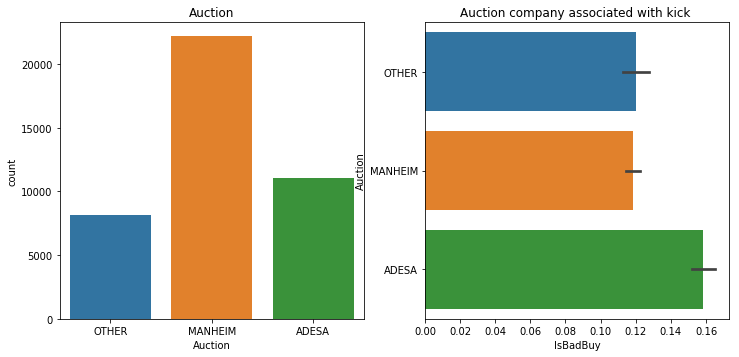

In [5]:
print(df1['Auction'].unique())
print(df1['Auction'].value_counts())

# ['OTHER' 'MANHEIM' nan 'ADESA']
# there are  44 nan values, since its only small proportion we will assign 'MANHEIM' 
# as the auction company as they hold the highest number

#df1['Auction'].replace(np.nan, 'MANHEIM')
#print(df1['Auction'].unique())
#print(df1['Auction'].isnull().values.sum())

print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['Auction'].value_counts(normalize=True))


plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Auction')
plt.title("Auction")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Auction', x='IsBadBuy', )
plt.title("Auction company associated with kick ")


#### VehYear

[2008.0, 2007.0, 2004.0, 2006.0, 2005.0, 2003.0, 2009.0, 2001.0, 2002.0, 2010.0]
Categories (10, float64): [2008.0, 2007.0, 2004.0, 2006.0, ..., 2009.0, 2001.0, 2002.0, 2010.0]
2006.0    9630
2005.0    8682
2007.0    6514
2004.0    5792
2008.0    4177
2003.0    3554
2002.0    1879
2001.0     816
2009.0     387
2010.0       1
Name: VehYear, dtype: int64


Normalised count (percentage) of VehYear with kick value prediction
IsBadBuy  VehYear
0         2006.0     8661
          2005.0     7482
          2007.0     6011
          2004.0     4822
          2008.0     3930
          2003.0     2815
          2002.0     1403
          2001.0      574
          2009.0      368
          2010.0        1
1         2005.0     1200
          2004.0      970
          2006.0      969
          2003.0      739
          2007.0      503
          2002.0      476
          2008.0      247
          2001.0      242
          2009.0       19
Name: VehYear, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


VehYear,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0
IsBadBuy,,,,,,,,,,
0,574,1403,2815,4822,7482,8661,6011,3930,368,1
1,242,476,739,970,1200,969,503,247,19,0


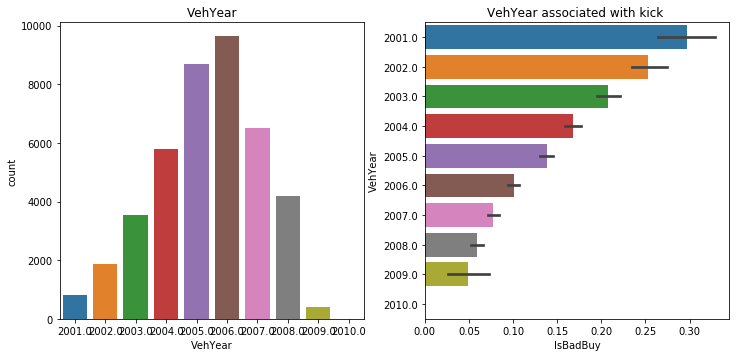

In [107]:
print(df1['VehYear'].unique())
print(df1['VehYear'].value_counts())

print("\n\nNormalised count (percentage) of VehYear with kick value prediction")
print(df.groupby(['IsBadBuy'])['VehYear'].value_counts())

df1['VehYear'] = pd.Categorical(df1['VehYear'])
plt.figure(figsize=(12,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VehYear' )
plt.title("VehYear")

plt.subplot(222)
dg = sns.barplot(data=df1, y='VehYear', x='IsBadBuy', )
plt.title("VehYear associated with kick ")

y =df.groupby(['IsBadBuy','VehYear']).size().unstack('VehYear',fill_value=0)
y

#### Make

['DODGE' 'CHRYSLER' 'CHEVROLET' 'PONTIAC' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KIA' 'SATURN' 'TOYOTA' 'FORD' 'BUICK' 'JEEP' 'NISSAN' 'INFINITI'
 'HYUNDAI' 'GMC' 'VOLKSWAGEN' 'HONDA' 'MERCURY' 'OLDSMOBILE' 'ACURA'
 'CADILLAC' 'ISUZU' 'LINCOLN' 'SUBARU' 'SCION' 'LEXUS' 'MINI' 'VOLVO']
CHEVROLET     9548
DODGE         7385
FORD          6458
CHRYSLER      5259
PONTIAC       2355
KIA           1337
SATURN        1245
NISSAN        1186
JEEP           985
HYUNDAI        957
SUZUKI         842
TOYOTA         664
MITSUBISHI     569
MAZDA          532
MERCURY        527
BUICK          413
GMC            351
HONDA          263
OLDSMOBILE     146
ISUZU           82
SCION           77
VOLKSWAGEN      73
LINCOLN         54
INFINITI        27
MINI            19
ACURA           19
CADILLAC        17
SUBARU          17
LEXUS           13
VOLVO           12
Name: Make, dtype: int64


Normalised count (percentage) of Make with kick value prediction
IsBadBuy  Make      
0         CHEVROLET     0.238085
     

Text(0.5,1,'Make associated with kick ')

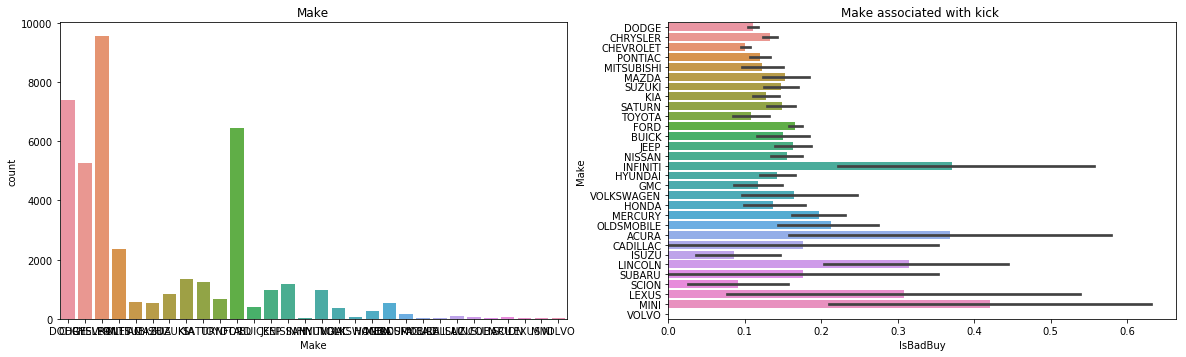

In [108]:
print(df1['Make'].unique())
print(df1['Make'].value_counts())

print("\n\nNormalised count (percentage) of Make with kick value prediction")
print(df.groupby(['IsBadBuy'])['Make'].value_counts(normalize=True))

plt.figure(figsize=(20,12))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Make')
plt.title("Make")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Make', x='IsBadBuy', )
plt.title("Make associated with kick ")

#### Color

In [8]:
# df['Color'] explore
print(df1['Color'].unique())
print(df1['Color'].value_counts())
# found missing values
#['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'NOT AVAIL'
#'GOLD' 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN' '?']
# replace '?' with SILVER as the highest number 

['RED' 'SILVER' 'WHITE' 'BLUE' 'BEIGE' 'BLACK' 'GREEN' 'GREY' 'NOT AVAIL'
 'GOLD' 'PURPLE' 'ORANGE' 'MAROON' 'YELLOW' 'OTHER' 'BROWN' '?']
SILVER       8541
WHITE        6890
BLUE         5855
BLACK        4392
GREY         4248
RED          3661
GOLD         3059
GREEN        1796
MAROON       1039
BEIGE         894
ORANGE        255
BROWN         249
PURPLE        205
YELLOW        141
OTHER         136
NOT AVAIL      65
?               6
Name: Color, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


        Color  IsBadBuy  count
0       BEIGE         0    772
1       BEIGE         1    122
2       BLACK         0   3889
3       BLACK         1    503
4        BLUE         0   5133
5        BLUE         1    722
6       BROWN         0    210
7       BROWN         1     39
8        GOLD         0   2602
9        GOLD         1    457
10      GREEN         0   1546
11      GREEN         1    250
12       GREY         0   3731
13       GREY         1    517
14     MAROON         0    907
15     MAROON         1    132
16  NOT AVAIL         0     45
17  NOT AVAIL         1     20
18     ORANGE         0    230
19     ORANGE         1     25
20      OTHER         0    120
21      OTHER         1     16
22     PURPLE         0    169
23     PURPLE         1     36
24        RED         0   3169
25        RED         1    492
26     SILVER         0   7416
27     SILVER         1   1131
28      WHITE         0   6009
29      WHITE         1    881
30     YELLOW         0    119
31     Y

Color,?,BEIGE,BLACK,BLUE,BROWN,GOLD,GREEN,GREY,MAROON,NOT AVAIL,ORANGE,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW
IsBadBuy,,,,,,,,,,,,,,,,,
0,5,772,3889,5133,210,2602,1546,3731,907,45,230,120,169,3169,7411,6009,119
1,1,122,503,722,39,457,250,517,132,20,25,16,36,492,1130,881,22


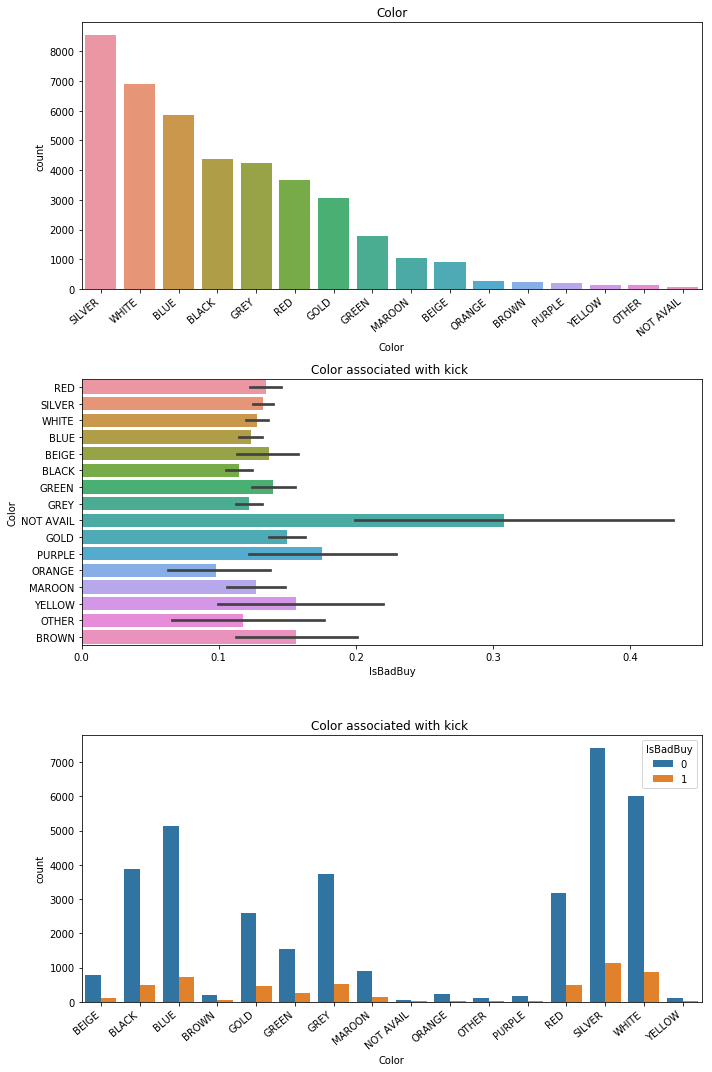

In [111]:
# Replace '?' into 'SILVER'
df1['Color'] = df1['Color'].replace('?', 'SILVER')

#print(df1.groupby(['IsBadBuy'])['Color'].value_counts(normalize=True))
test = pd.DataFrame({'count': df1.groupby(['Color', 'IsBadBuy']).size()}).reset_index()
print(test)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
Color_Countplot = sns.countplot(data=df1, x='Color', order=df1['Color'].value_counts().index)
Color_Countplot.set_xticklabels(Color_Countplot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color")

plt.subplot(3,1,2)
Color_barplot = sns.barplot(data=df1, y='Color', x='IsBadBuy')
plt.title("Color associated with kick ")

plt.subplot(3,1,3)
test_plot = sns.barplot(data=test, x='Color', y='count', hue='IsBadBuy')
test_plot.set_xticklabels(test_plot.get_xticklabels(), rotation=40, ha="right")
plt.title("Color associated with kick ")

plt.tight_layout()

y =df.groupby(['Color','IsBadBuy']).size().unstack('Color',fill_value=0)
y

#### Transmission

Imputation by majority value
replace '?' with 'AUTO'
replace 'Manual' with 'MANUAL'

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """




Normalised count (Transmission)  with kick value prediction
IsBadBuy  Transmission
0         AUTO            0.963512
          MANUAL          0.036488
1         AUTO            0.966449
          MANUAL          0.033551
Name: Transmission, dtype: float64


  Transmission  IsBadBuy  count
0         AUTO         0  34751
1         AUTO         1   5185
2       MANUAL         0   1316
3       MANUAL         1    180


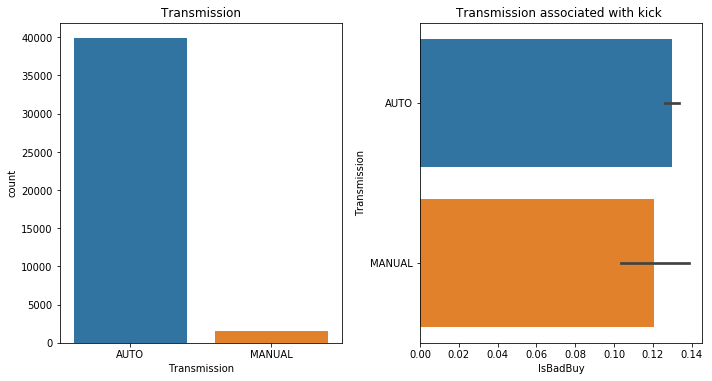

In [10]:
#Replace ? => Auto
#Replace Manual => MANUAL

df1['Transmission'] = df1['Transmission'].replace('?', 'AUTO')
df1['Transmission'] = df1['Transmission'].replace('Manual', 'MANUAL')
print("\n\nNormalised count (Transmission)  with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Transmission'].value_counts(normalize=True))
print("\n")
test = pd.DataFrame({'count': df1.groupby(['Transmission', 'IsBadBuy']).size()}).reset_index()
print(test)

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Transmission',)
plt.title("Transmission")

plt.subplot(222)
dg = sns.barplot(data=df1, y='Transmission', x='IsBadBuy', )
plt.title("Transmission associated with kick ")
plt.tight_layout()

#### WheelTypeID

In [11]:
print(df1['WheelTypeID'].unique())
print(df1['WheelTypeID'].value_counts())

['2' '1' '?' '3' '0']
1    20426
2    18791
?     1775
3      437
0        3
Name: WheelTypeID, dtype: int64




Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelTypeID
0         1              0.501982
          2              0.477667
          3              0.010508
          ?              0.009787
          0              0.000055
1         1              0.432619
          2              0.291333
          ?              0.265051
          3              0.010811
          0              0.000186
Name: WheelTypeID, dtype: float64


  WheelTypeID  IsBadBuy  count
0           0         0      2
1           0         1      1
2           1         0  18458
3           1         1   3743
4           2         0  17228
5           2         1   1563
6           3         0    379
7           3         1     58


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'WheelTypeID associated with kick ')

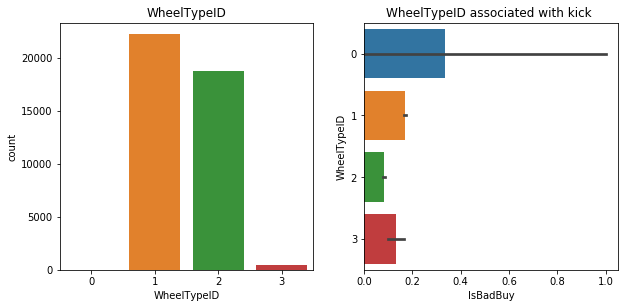

In [12]:
# replace by majority since data is categorical
df1['WheelTypeID'] = df1['WheelTypeID'].replace('?', '1')
df1['WheelTypeID'] = pd.Categorical(df1['WheelTypeID'])
print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['WheelTypeID'].value_counts(normalize=True))
print("\n")
test = pd.DataFrame({'count': df1.groupby(['WheelTypeID', 'IsBadBuy']).size()}).reset_index()
print(test)

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelTypeID')
plt.title("WheelTypeID")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelTypeID', x='IsBadBuy', )
plt.title("WheelTypeID associated with kick ")

#### WheelType

In [13]:
print(df1['WheelType'].unique())
print(df1['WheelType'].value_counts())
print(df1['WheelType'].isnull().values.sum())

['Covers' 'Alloy' '?' 'Special' nan]
Alloy      20406
Covers     18761
?           1777
Special      436
Name: WheelType, dtype: int64
52




Normalised count (percentage) of auction company with kick value prediction
IsBadBuy  WheelType
0         Alloy        0.502082
          Covers       0.477571
          Special      0.010493
          ?            0.009855
1         Alloy        0.432972
          Covers       0.290702
          ?            0.265497
          Special      0.010829
Name: WheelType, dtype: float64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'WheelType associated with kick ')

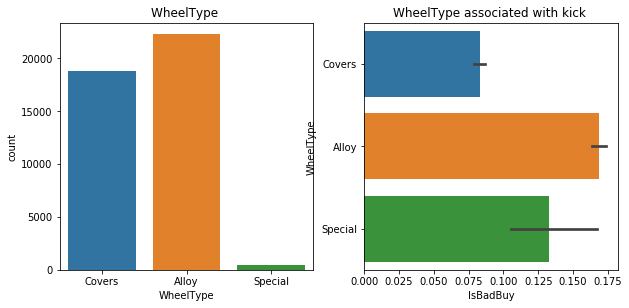

In [14]:
df1['WheelType'] = df1['WheelType'].replace(np.nan, 'Alloy')
df1['WheelType'] = df1['WheelType'].replace('?', 'Alloy')

print("\n\nNormalised count (percentage) of auction company with kick value prediction")
print(df.groupby(['IsBadBuy'])['WheelType'].value_counts(normalize=True))

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='WheelType')
plt.title("WheelType ")

plt.subplot(222)
dg = sns.barplot(data=df1, y='WheelType', x='IsBadBuy', )
plt.title("WheelType associated with kick ")

#### VehOdo 

In [15]:
print(df1['VehOdo'].unique())
print(df1['VehOdo'].value_counts(bins=10000))
print(df1['VehOdo'].isnull().values.sum())

[51099. 48542. 46318. ... 65399. 45234. 66855.]
(78411.427, 78459.414]      75
(79947.002, 79994.988]      72
(76827.866, 76875.853]      71
(78699.348, 78747.334]      70
(78603.374, 78651.361]      69
(76779.88, 76827.866]       69
(72509.063, 72557.05]       68
(82634.257, 82682.244]      67
(75052.358, 75100.345]      67
(80522.842, 80570.829]      67
(72125.17, 72173.156]       67
(79899.015, 79947.002]      66
(79611.095, 79659.082]      66
(72844.97, 72892.957]       66
(77691.627, 77739.614]      66
(78843.308, 78891.294]      66
(80570.829, 80618.816]      65
(79515.122, 79563.108]      65
(72701.01, 72748.997]       65
(77499.68, 77547.667]       65
(79083.241, 79131.228]      65
(77883.574, 77931.56]       65
(76204.039, 76252.026]      64
(78507.401, 78555.388]      64
(75628.199, 75676.185]      64
(84841.645, 84889.632]      64
(75244.305, 75292.292]      63
(73324.837, 73372.824]      63
(74380.545, 74428.531]      63
(74236.584, 74284.571]      63
                      

Text(0.5,1,'VehOdo that is KICK')

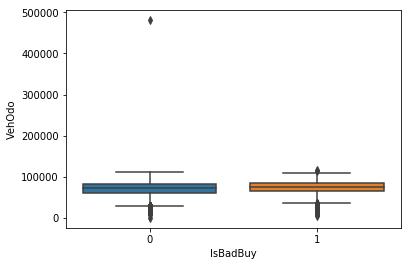

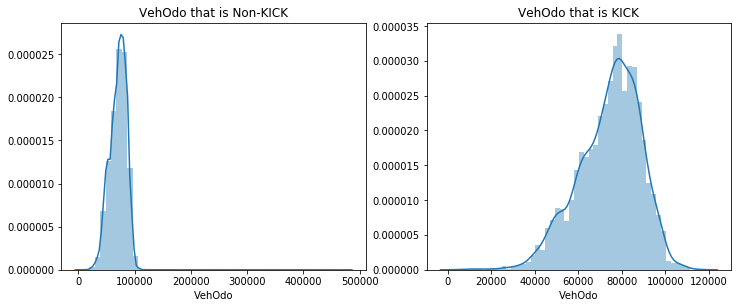

In [16]:
ax = sns.boxplot(x="IsBadBuy", y="VehOdo", data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehOdo)
plt.title('VehOdo that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehOdo)
plt.title('VehOdo that is KICK')

#### Nationality

In [17]:
print(df1['Nationality'].unique())
print(df1['Nationality'].value_counts())
print(df1['Nationality'].isnull().values.sum())

['AMERICAN' 'OTHER ASIAN' 'USA' 'TOP LINE ASIAN' 'OTHER' '?']
AMERICAN          34616
OTHER ASIAN        4474
TOP LINE ASIAN     2110
USA                 125
OTHER               104
?                     3
Name: Nationality, dtype: int64
0


In [18]:
# replace '?' and 'USA' with 'AMERICAN'
df1['Nationality'] = df1['Nationality'].replace('?', 'AMERICAN')
df1['Nationality'] = df1['Nationality'].replace('USA', 'AMERICAN')
print(df1['Nationality'].unique())

['AMERICAN' 'OTHER ASIAN' 'TOP LINE ASIAN' 'OTHER']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Nationality   
0         AMERICAN          0.840408
          OTHER ASIAN       0.106857
          TOP LINE ASIAN    0.050406
          OTHER             0.002329
1         AMERICAN          0.826281
          OTHER ASIAN       0.115564
          TOP LINE ASIAN    0.054427
          OTHER             0.003728
Name: Nationality, dtype: float64


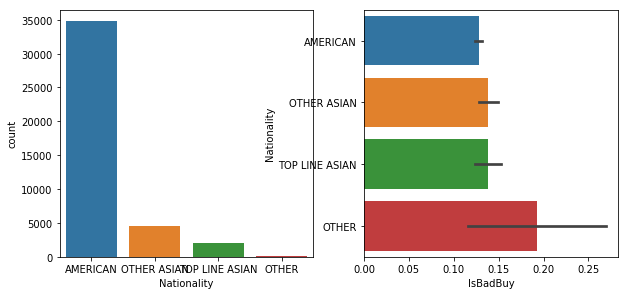

In [19]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Nationality'].value_counts(normalize=True))

plt.figure(figsize=(10,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Nationality')

plt.subplot(222)
dg = sns.barplot(data=df1, y='Nationality', x='IsBadBuy')

#### Size

In [20]:
print(df1['Size'].unique())
print(df1['Size'].value_counts())
print(df1['Size'].isnull().values.sum())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS' '?']
MEDIUM         17540
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
?                  3
Name: Size, dtype: int64
0


In [21]:
# replace '?' and 'USA' with 'AMERICAN'
df1['Size'] = df1['Size'].replace('?', 'MEDIUM')
print(df1['Size'].unique())

['MEDIUM' 'COMPACT' 'LARGE' 'MEDIUM SUV' 'SPECIALTY' 'CROSSOVER' 'VAN'
 'LARGE SUV' 'SMALL TRUCK' 'LARGE TRUCK' 'SMALL SUV' 'SPORTS']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  Size       
0         MEDIUM         0.427233
          LARGE          0.125405
          MEDIUM SUV     0.106552
          COMPACT        0.093132
          VAN            0.081044
          LARGE TRUCK    0.046081
          SMALL SUV      0.031636
          SPECIALTY      0.024870
          CROSSOVER      0.023845
          LARGE SUV      0.018965
          SMALL TRUCK    0.011617
          SPORTS         0.009621
1         MEDIUM         0.397763
          MEDIUM SUV     0.135322
          COMPACT        0.126002
          LARGE          0.082945
          VAN            0.082759
          LARGE TRUCK    0.043802
          SMALL SUV      0.035601
          LARGE SUV      0.027213
          CROSSOVER      0.021249
          SPECIALTY      0.018826
          SPORTS         0.014539
          SMALL TRUCK    0.013979
Name: Size, dtype: float64


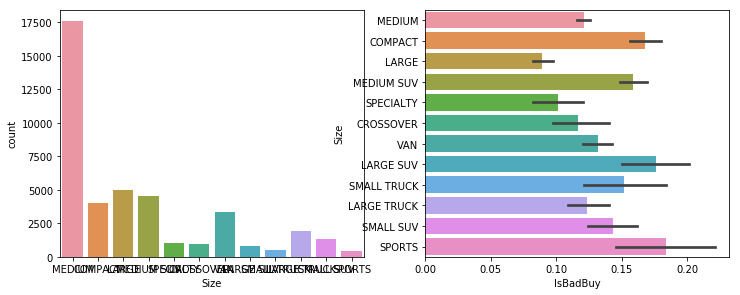

In [22]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['Size'].value_counts(normalize=True))

plt.figure(figsize=(12,10))
plt.subplot(221)
dg = sns.countplot(data=df1, x='Size', )
plt.subplot(222)
dg = sns.barplot(data=df1, y='Size', x='IsBadBuy', )

#### TopThreeAmericanName

In [23]:
print(df1['TopThreeAmericanName'].unique())
print(df1['TopThreeAmericanName'].value_counts())
print(df1['TopThreeAmericanName'].isnull().values.sum())

['CHRYSLER' 'GM' 'OTHER' 'FORD' '?']
GM          14075
CHRYSLER    13627
FORD         7039
OTHER        6688
?               3
Name: TopThreeAmericanName, dtype: int64
0


In [24]:
# replace '?' with 'GM'
df1['TopThreeAmericanName'] = df1['TopThreeAmericanName'].replace('?', 'GM')
print(df1['TopThreeAmericanName'].unique())

['CHRYSLER' 'GM' 'OTHER' 'FORD']


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  




Normalised count (percentage) of Nationality with kick value prediction
IsBadBuy  TopThreeAmericanName
0         GM                      0.346938
          CHRYSLER                0.331356
          FORD                    0.162115
          OTHER                   0.159592
1         CHRYSLER                0.312395
          GM                      0.291705
          FORD                    0.222181
          OTHER                   0.173719
Name: TopThreeAmericanName, dtype: float64


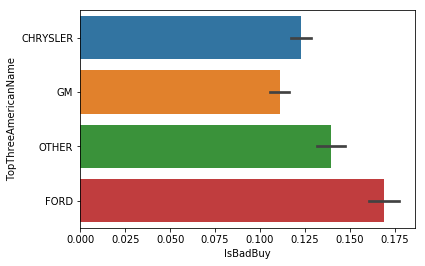

In [25]:
print("\n\nNormalised count (percentage) of Nationality with kick value prediction")
print(df1.groupby(['IsBadBuy'])['TopThreeAmericanName'].value_counts(normalize=True))
dg = sns.barplot(data=df1, y='TopThreeAmericanName', x='IsBadBuy')

#### MMRAcquisitionAuctionAveragePrice

In [26]:
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())

16


0


Normalised count (percentage) of MMRAcquisitionAuctionAveragePrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

Text(0.5,1,'MMRAcquisitionAuctionAveragePrice that is KICK')

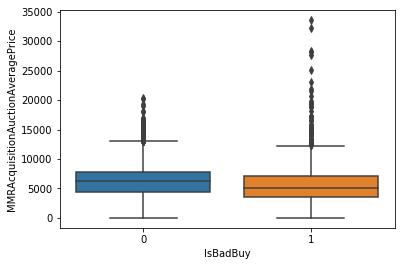

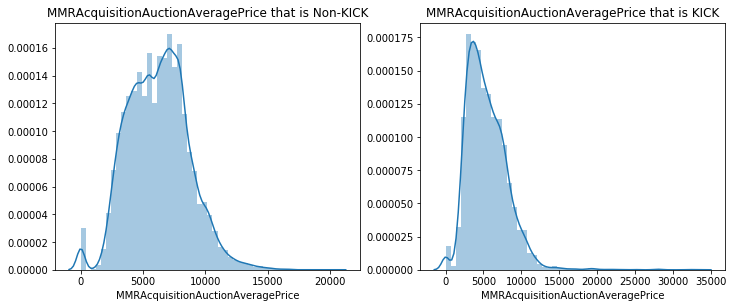

In [27]:

#print(df1['MMRAcquisitionAuctionAveragePrice'].unique())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts())
# replace '?' with '0'
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionAveragePrice'])
df1['MMRAcquisitionAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionAveragePrice'] = df1['MMRAcquisitionAuctionAveragePrice'].fillna((df1['MMRAcquisitionAuctionAveragePrice'].mean()))
print(df1['MMRAcquisitionAuctionAveragePrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))
print("\n\nNormalised count (percentage) of MMRAcquisitionAuctionAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionAveragePrice)
plt.title('MMRAcquisitionAuctionAveragePrice that is KICK')

#### MMRAcquisitionAuctionCleanPrice

In [28]:
print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionCleanPrice'].unique())
#print(df1['MMRAcquisitionAuctionCleanPrice'].value_counts())

3




Normalised count (percentage) of MMRAcquisitionAuctionCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRAcquisitionAuctionCleanPrice that is KICK')

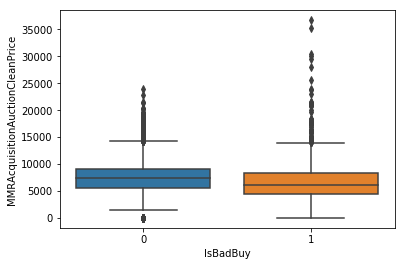

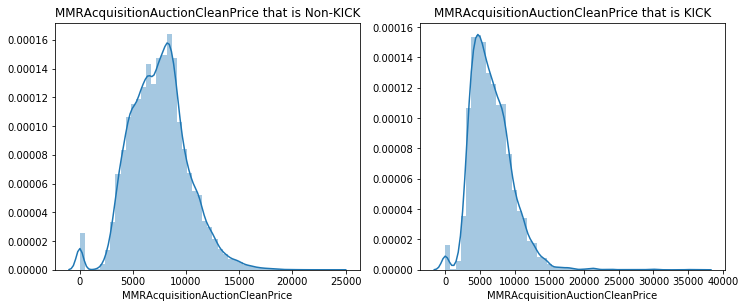

In [29]:
# replace '?' with '0'
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionAuctionCleanPrice'] = pd.to_numeric(df1['MMRAcquisitionAuctionCleanPrice'])
df1['MMRAcquisitionAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionAuctionCleanPrice'] = df1['MMRAcquisitionAuctionCleanPrice'].fillna((df1['MMRAcquisitionAuctionCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitionAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionAuctionCleanPrice)
plt.title('MMRAcquisitionAuctionCleanPrice that is KICK')

#### MMRAcquisitionRetailAveragePrice

In [30]:
print(df1['MMRAcquisitionRetailAveragePrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRAcquisitionRetailAveragePrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRAcquisitionRetailAveragePrice that is KICK')

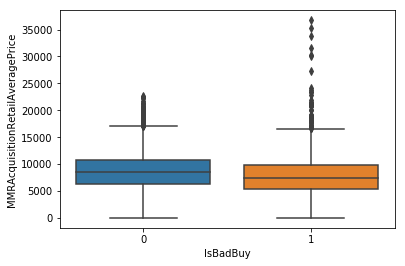

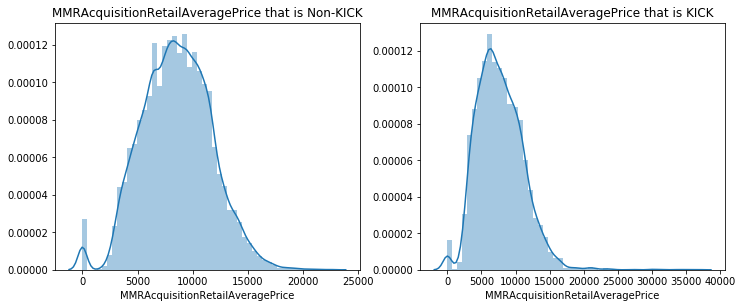

In [31]:
# replace '?' with '0'
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitionRetailAveragePrice'] = pd.to_numeric(df1['MMRAcquisitionRetailAveragePrice'])
df1['MMRAcquisitionRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitionRetailAveragePrice'] = df1['MMRAcquisitionRetailAveragePrice'].fillna((df1['MMRAcquisitionRetailAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitionRetailAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitionRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitionRetailAveragePrice)
plt.title('MMRAcquisitionRetailAveragePrice that is KICK')

####  MMRAcquisitonRetailCleanPrice

In [32]:
print(df1['MMRAcquisitonRetailCleanPrice'].isnull().values.sum())

105




Normalised count (percentage) of MMRAcquisitonRetailCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRAcquisitonRetailCleanPrice that is KICK')

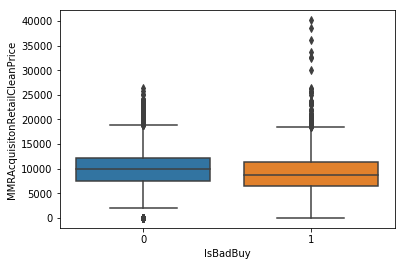

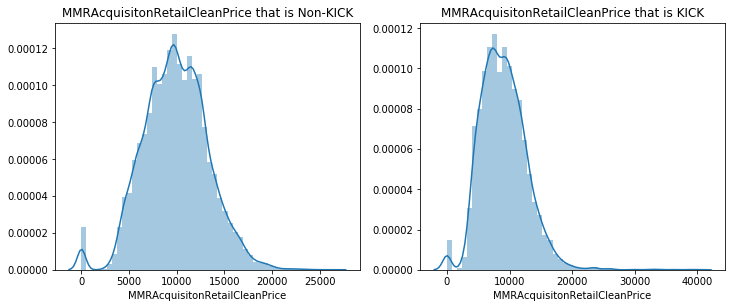

In [33]:
# replace '?' with '0'
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRAcquisitonRetailCleanPrice'] = pd.to_numeric(df1['MMRAcquisitonRetailCleanPrice'])
df1['MMRAcquisitonRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRAcquisitonRetailCleanPrice'] = df1['MMRAcquisitonRetailCleanPrice'].fillna((df1['MMRAcquisitonRetailCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRAcquisitonRetailCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRAcquisitonRetailCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRAcquisitonRetailCleanPrice)
plt.title('MMRAcquisitonRetailCleanPrice that is KICK')


####  MMRCurrentAuctionAveragePrice

In [34]:
print(df1['MMRCurrentAuctionAveragePrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRCurrentAuctionAveragePrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRCurrentAuctionAveragePrice that is KICK')

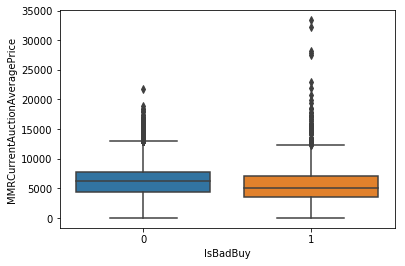

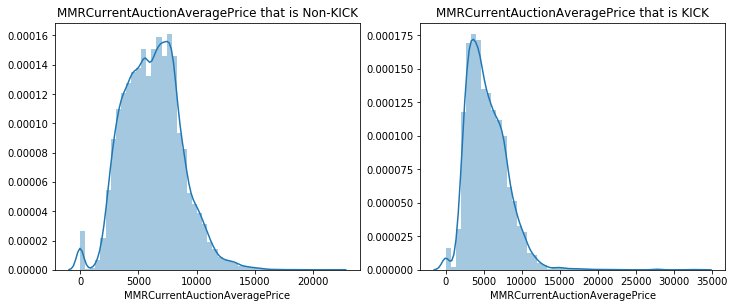

In [35]:
# replace '?' with '0'
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionAveragePrice'] = pd.to_numeric(df1['MMRCurrentAuctionAveragePrice'])
df1['MMRCurrentAuctionAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionAveragePrice'] = df1['MMRCurrentAuctionAveragePrice'].fillna((df1['MMRCurrentAuctionAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionAveragePrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionAveragePrice)
plt.title('MMRCurrentAuctionAveragePrice that is KICK')


#### MMRCurrentAuctionCleanPrice

In [36]:
print(df1['MMRCurrentAuctionCleanPrice'].isnull().values.sum())

3




Normalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRCurrentAuctionCleanPrice that is KICK')

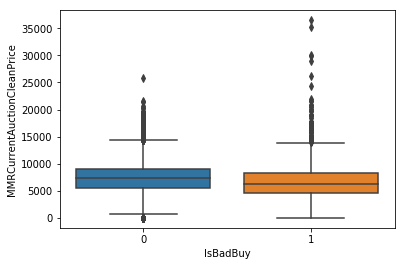

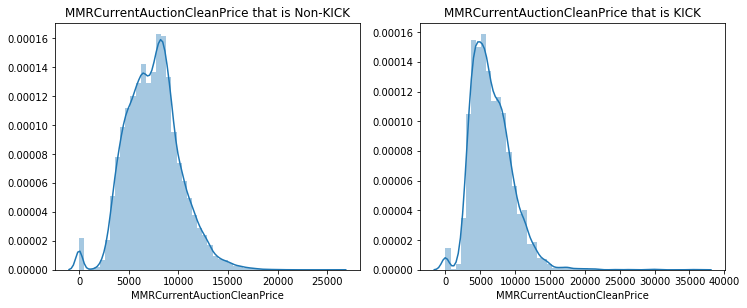

In [37]:
# replace '?' with '0'
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentAuctionCleanPrice'] = pd.to_numeric(df1['MMRCurrentAuctionCleanPrice'])
df1['MMRCurrentAuctionCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentAuctionCleanPrice'] = df1['MMRCurrentAuctionCleanPrice'].fillna((df1['MMRCurrentAuctionCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentAuctionCleanPrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentAuctionCleanPrice)
plt.title('MMRCurrentAuctionCleanPrice that is KICK')



####  MMRCurrentRetailAveragePrice

In [38]:
print(df1['MMRCurrentRetailAveragePrice'].isnull().values.sum())

23




Normalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRCurrentRetailAveragePrice that is KICK')

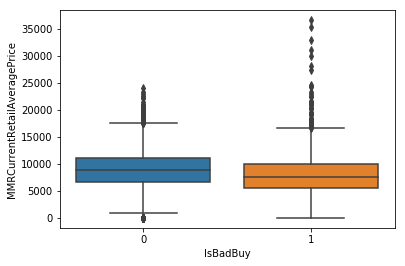

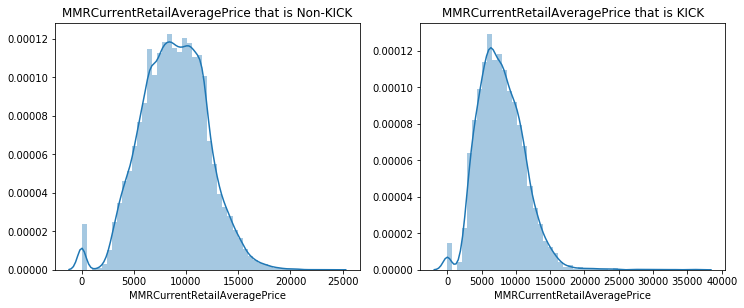

In [39]:
# replace '?' with '0'
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailAveragePrice'] = pd.to_numeric(df1['MMRCurrentRetailAveragePrice'])
df1['MMRCurrentRetailAveragePrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailAveragePrice'] = df1['MMRCurrentRetailAveragePrice'].fillna((df1['MMRCurrentRetailAveragePrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentAuctionCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailAveragePrice', data=df1)

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailAveragePrice)
plt.title('MMRCurrentRetailAveragePrice that is KICK')



#### MMRCurrentRetailCleanPrice

In [40]:
print(df1['MMRCurrentRetailCleanPrice'].isnull().values.sum())

23




Normalised count (percentage) of MMRCurrentRetailCleanPrice with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'Market clean price that is KICK')

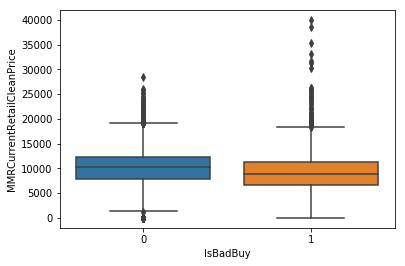

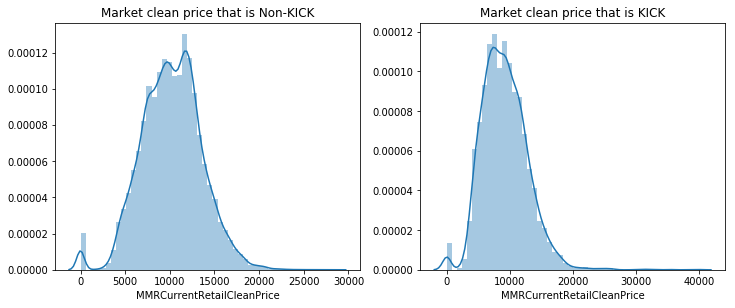

In [41]:
# replace '?' with '0'
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].replace('?', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailCleanPrice'] = pd.to_numeric(df1['MMRCurrentRetailCleanPrice'])
df1['MMRCurrentRetailCleanPrice'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailCleanPrice'] = df1['MMRCurrentRetailCleanPrice'].fillna((df1['MMRCurrentRetailCleanPrice'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentRetailCleanPrice with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailCleanPrice', data=df1)
#plt.show()

plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailCleanPrice)
plt.title('Market clean price that is KICK')

#### MMRCurrentRetailRatio

In [42]:
print(df1['MMRCurrentRetailRatio'].isnull().values.sum())

316




Normalised count (percentage) of MMRCurrentRetailRatio with kick value prediction


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

Text(0.5,1,'MMRCurrentRetailRatio  that is KICK')

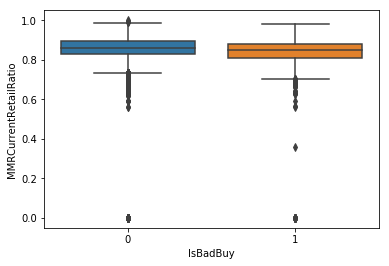

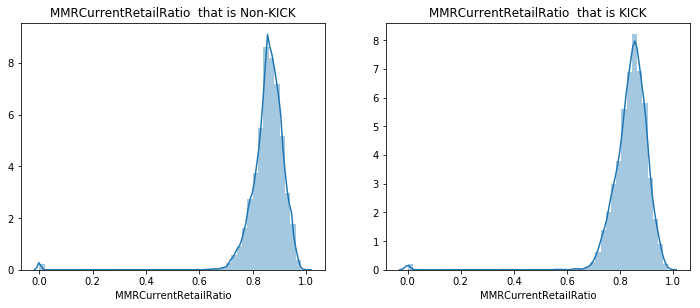

In [43]:
# replace '?' with '0'
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].replace('#VALUE!', '0')

# convert data type from string to numeric
df1['MMRCurrentRetailRatio'] = pd.to_numeric(df1['MMRCurrentRetailRatio'])
df1['MMRCurrentRetailRatio'].unique()

# fill the missing value with the mean of the column
df1['MMRCurrentRetailRatio'] = df1['MMRCurrentRetailRatio'].fillna((df1['MMRCurrentRetailRatio'].mean()))
#print(df1['MMRAcquisitionAuctionCleanPrice'].isnull().values.sum())
#print(df1['MMRAcquisitionAuctionAveragePrice'].value_counts(bins = 100))


print("\n\nNormalised count (percentage) of MMRCurrentRetailRatio with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['MMRAcquisitionAuctionAveragePrice'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='MMRCurrentRetailRatio', data=df1)


plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].MMRCurrentRetailRatio)
plt.title('MMRCurrentRetailRatio  that is KICK')


#### PRIMEUNIT 

In [44]:
print(df1['PRIMEUNIT'].unique())
print(df1['PRIMEUNIT'].value_counts())

['?' 'NO' 'YES']
?      39634
NO      1764
YES       34
Name: PRIMEUNIT, dtype: int64


####  AUCGUART

In [45]:
print(df1['AUCGUART'].unique())
print(df1['AUCGUART'].value_counts())

['?' 'GREEN' 'RED']
?        39634
GREEN     1754
RED         44
Name: AUCGUART, dtype: int64


In [46]:
print(df1['AUCGUART'].unique())
print(df1['AUCGUART'].value_counts())

['?' 'GREEN' 'RED']
?        39634
GREEN     1754
RED         44
Name: AUCGUART, dtype: int64


#### VNST 

['NC' 'CA' 'TX' 'FL' 'NV' 'CO' 'NM' 'LA' 'SC' 'WV' 'TN' 'OH' 'VA' 'IN'
 'GA' 'IL' 'AZ' 'PA' 'MO' 'AL' 'MS' 'WA' 'ID' 'OK' 'NH' 'NJ' 'NY' 'NE'
 'OR' 'KY' 'UT']


Text(0.5,1,'VNST associated with kick ')

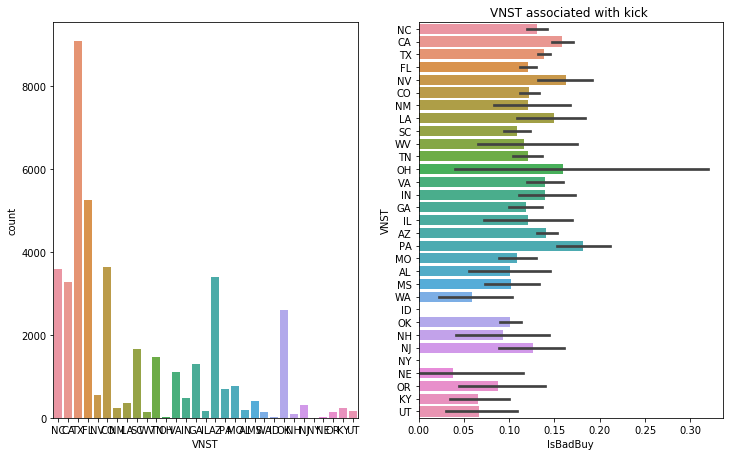

In [47]:
print(df1['VNST'].unique())
#print(df1['VNST'].value_counts())
#print("\n\nNormalised count (percentage) of VNST with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VNST'].value_counts(normalize=True))
plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='VNST')

plt.subplot(222)
dg = sns.barplot(data=df1, y='VNST', x='IsBadBuy', )
plt.title("VNST associated with kick ")

#### VehBCost

In [48]:
print(df1['VehBCost'].isnull().values.sum())
df1['VehBCost'].unique()

0


array(['7800', '6000', '7500', ..., '10885', '11945', '3205'],
      dtype=object)

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'Purchase cost that is KICK')

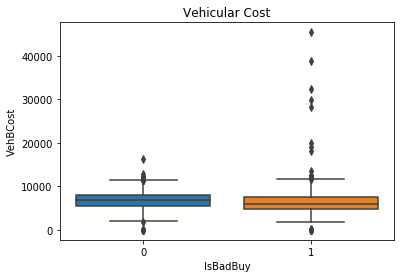

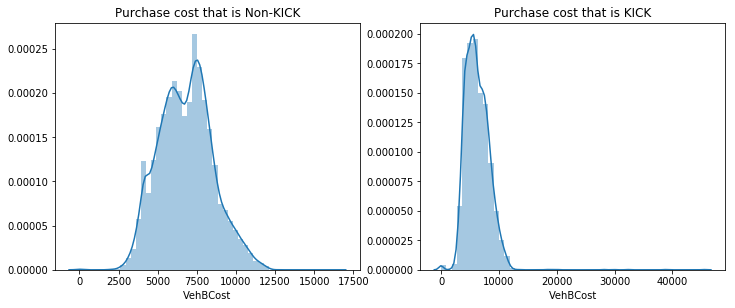

In [49]:
# replace '?' with '0'
df1['VehBCost'] = df1['VehBCost'].replace('?', '0')

# convert data type from string to numeric
df1['VehBCost'] = pd.to_numeric(df1['VehBCost'])
df1['VehBCost'].unique()

#print("\n\nNormalised count (percentage) of VehBCost with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VehBCost'].value_counts(normalize=True))
dg = sns.boxplot( x ='IsBadBuy', y ='VehBCost', data=df1).set_title('Vehicular Cost')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].VehBCost)
plt.title('Purchase cost that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].VehBCost)
plt.title('Purchase cost that is KICK')




#### IsOnlineSale 

problems on this area

In [50]:
print(df1['IsOnlineSale'].isnull().values.sum())
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

0
[0.0 -1.0 2.0 4.0 1.0 '0' '1' '?']
0.0     31368
0        8572
1.0       753
-1.0      601
1         134
?           2
4.0         1
2.0         1
Name: IsOnlineSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
0.0    39944
1.0     1488
Name: IsOnlineSale, dtype: int64


Normalised count (percentage) of IsOnlineSale with kick value prediction
IsBadBuy  IsOnlineSale
0         0.0             0.963734
          1.0             0.036266
1         0.0             0.966449
          1.0             0.033551
Name: IsOnlineSale, dtype: float64


Text(0.5,1,'IsOnlineSale associated with kick ')

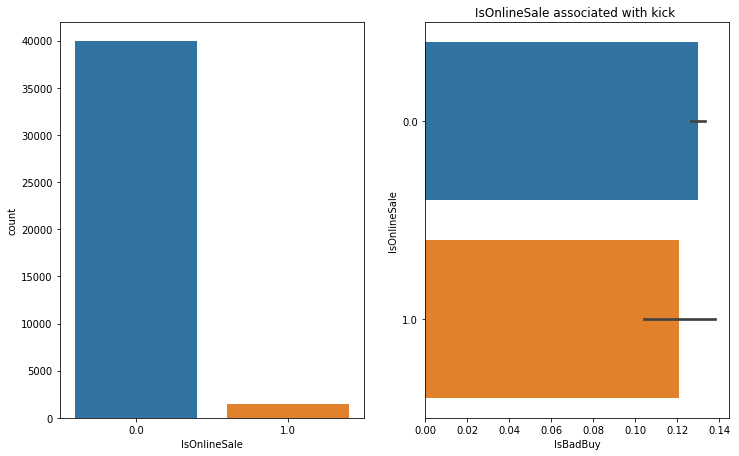

In [51]:
# replace '?' with '0'
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace('?', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace(-1.0, 1)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 2, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 4, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( 0.0, 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '0', 0)
df1['IsOnlineSale'] = df1['IsOnlineSale'].replace( '1', 1)


# convert data type from string to numeric
df1['IsOnlineSale'] = pd.Categorical(df1['IsOnlineSale'])
print(df1['IsOnlineSale'].unique())
print(df1['IsOnlineSale'].value_counts())

print("\n\nNormalised count (percentage) of IsOnlineSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['IsOnlineSale'].value_counts(normalize=True))

plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='IsOnlineSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='IsOnlineSale', x='IsBadBuy', )
plt.title("IsOnlineSale associated with kick ")

#### WarrantyCost

In [52]:
print(df1['WarrantyCost'].isnull().values.sum())
#print(df1['WarrantyCost'].unique())
print(df1['WarrantyCost'].value_counts(bins=10000))

0
(919.34, 920.044]       1667
(1973.333, 1974.036]    1337
(2151.344, 2152.047]    1207
(1214.852, 1215.556]    1183
(1388.641, 1389.345]    1166
(1154.342, 1155.046]    1075
(727.961, 728.664]       958
(802.542, 803.246]       943
(1502.624, 1503.328]     889
(1242.996, 1243.7]       868
(1085.39, 1086.093]      866
(568.947, 569.651]       810
(1019.955, 1020.658]     790
(1702.447, 1703.15]      774
(982.664, 983.368]       763
(1271.844, 1272.547]     699
(1622.94, 1623.644]      687
(532.36, 533.064]        686
(852.498, 853.202]       661
(833.501, 834.204]       653
(753.994, 754.698]       627
(1762.956, 1763.66]      623
(504.92, 505.623]        617
(824.354, 825.058]       617
(670.969, 671.673]       609
(1372.458, 1373.162]     597
(1505.439, 1506.142]     574
(692.781, 693.484]       571
(1632.79, 1633.494]      567
(974.924, 975.628]       558
                        ... 
(5014.996, 5015.699]       0
(5014.292, 5014.996]       0
(5013.588, 5014.292]       0
(5012.885, 5

Text(0.5,1,'WarrantyCost that is KICK')

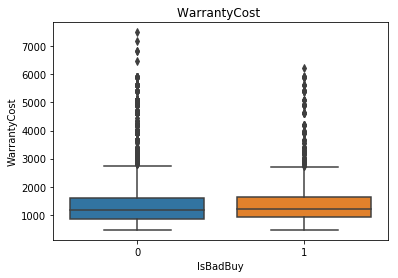

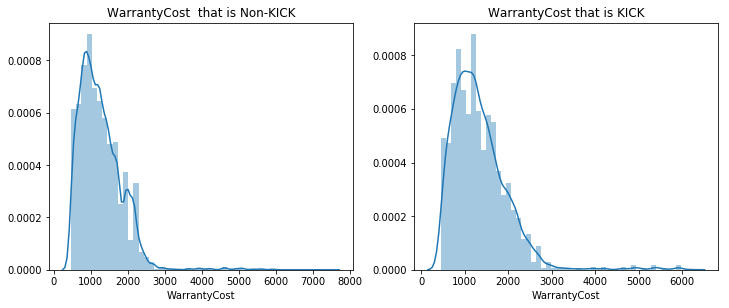

In [53]:
 #replace '?' with '0'
#df1['WarrantyCost'] = df1['WarrantyCost'].replace('?', '0')

# convert data type from string to numeric
#df1['VehBCost'] = pd.to_numeric(df1['VehBCost'])
#df1['VehBCost'].unique()

#print("\n\nNormalised count (percentage) of VehBCost with kick value prediction")
#print(df1.groupby(['IsBadBuy'])['VehBCost'].value_counts(normalize=True))
#dg = sns.boxplot( x ='IsBadBuy', y ='WarrantyCost', data=df1)
#dg = sns.distplot(df1['WarrantyCost'])


dg = sns.boxplot( x ='IsBadBuy', y ='WarrantyCost', data=df1).set_title('WarrantyCost ')

# create discplots to sepate kick and non kick in terms of vehicular cost 
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df1[df1['IsBadBuy']==0].WarrantyCost)
plt.title('WarrantyCost  that is Non-KICK')

plt.subplot(222)
sns.distplot(df1[df1['IsBadBuy']==1].WarrantyCost)
plt.title('WarrantyCost that is KICK')







#### ForSale 

In [54]:
#print(df1['IsBadBuy'].isnull().values.sum())
print(df1['ForSale'].unique())
print(df1['ForSale'].value_counts())

['Yes' 'No' '?' 'yes' '0' 'YES']
Yes    27358
YES     8544
yes     5524
?          3
No         2
0          1
Name: ForSale, dtype: int64


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt



Normalised count (percentage) of ForSale with kick value prediction
IsBadBuy  ForSale
0         Yes        0.999917
          No         0.000083
1         Yes        1.000000
Name: ForSale, dtype: float64


Text(0.5,1,'ForSale associated with kick ')

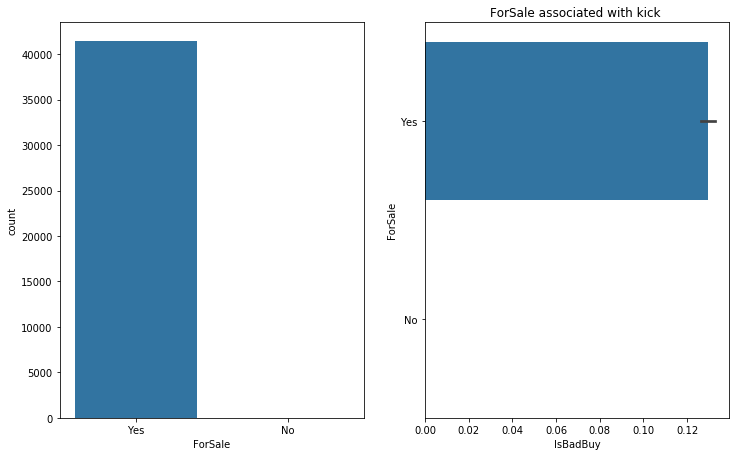

In [55]:
# replace noisy
df1['ForSale'] = df1['ForSale'].replace('yes', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('YES', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('?', 'Yes')
df1['ForSale'] = df1['ForSale'].replace('0', 'No')

print("\n\nNormalised count (percentage) of ForSale with kick value prediction")
print(df1.groupby(['IsBadBuy'])['ForSale'].value_counts(normalize=True))

plt.figure(figsize=(12,16))
plt.subplot(221)
dg = sns.countplot(data=df1, x='ForSale')

plt.subplot(222)
dg = sns.barplot(data=df1, y='ForSale', x='IsBadBuy', )
plt.title("ForSale associated with kick ")

#### IsBadBuy 

In [56]:
#print(df1['IsBadBuy'].isnull().values.sum())
print(df1['IsBadBuy'].unique())
print(df1['IsBadBuy'].value_counts())

[0 1]
0    36067
1     5365
Name: IsBadBuy, dtype: int64


Text(0.5,1,'Percentage of Kick')

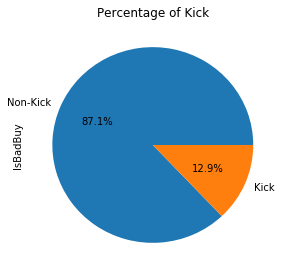

In [57]:
labels = 'Non-Kick' , 'Kick'
df1['IsBadBuy'].value_counts().plot.pie(figsize = (4.5,4.5), labels = labels,  autopct='%1.1f%%',).set_title('Percentage of Kick')
#plt.show()

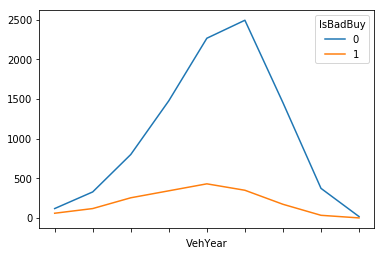

In [82]:
cI= df1[df1.Auction=="ADESA"]
cI.groupby(['VehYear','IsBadBuy']).size().unstack('IsBadBuy', fill_value =0).plot()

### # Setting up the dataFrame for Machine learning

In [66]:
# Setting up the dataFrame for Machine learning 
# copy the data and exclude some columns(dropcol) unncessary for training
dropcol = (['PurchaseID','PurchaseTimestamp', 'PurchaseDate' ,'WheelTypeID', 'PRIMEUNIT', \
            'AUCGUART', 'IsOnlineSale', 'ForSale'])
df_final = df1.drop(dropcol,  axis = 1)

In [67]:
# correcting nominal variable for 'Transmission' to encode as binary
trans_map = {'AUTO':0, 'MANUAL':1}
df_final['Transmission'] = df_final['Transmission'].map(trans_map)

In [69]:
# random segmenting
df_0,df_1  = [x for _, x in df_final.groupby(df_final['IsBadBuy'] ==1)]
df_0=df_0.iloc[:5365, :]
df_final=pd.concat([df_0, df_1])


In [255]:
# Correcting categorical variable by using one hot encoding
df_final = pd.concat([df_final,pd.get_dummies(df_final['Auction'], prefix='Auction', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['VehYear'], prefix='VehYear', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['Make'], prefix='Make', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['Color'], prefix='Color', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['WheelType'], prefix='WheelType', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['Nationality'], prefix='Nationality', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['Size'], prefix='Size', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['TopThreeAmericanName'], prefix='TopThreeAmericanName', prefix_sep='_', columns= (''))], axis=1)
df_final = pd.concat([df_final,pd.get_dummies(df_final['VNST'], prefix='VNST', prefix_sep='_', columns= (''))], axis=1)


In [256]:
# drop the original columns after one hot encoding
df_final.drop(['Auction'],axis=1, inplace=True)
df_final.drop(['VehYear'],axis=1, inplace=True)
df_final.drop(['Make'],axis=1, inplace=True)
df_final.drop(['Color'],axis=1, inplace=True)
df_final.drop(['WheelType'],axis=1, inplace=True)
df_final.drop(['Nationality'],axis=1, inplace=True)
df_final.drop(['Size'],axis=1, inplace=True)
df_final.drop(['TopThreeAmericanName'],axis=1, inplace=True)
df_final.drop(['VNST'],axis=1, inplace=True)


In [257]:
df_final.head(20)

,Transmission,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,0,51099.0,8566.0,9325.0,9751,10571,7781,8545,11777,12505,...,0,0,0,0,0,0,0,0,0,0
1,0,48542.0,8566.0,9325.0,9751,10571,8568,9325,9753,10571,...,0,0,0,0,0,0,0,0,0,0
2,0,46318.0,8835.0,9428.0,10042,10682,8137,8733,9288,9932,...,0,0,0,0,0,0,0,0,0,0
3,0,50413.0,7165.0,7770.0,8238,8892,7074,7629,8140,8739,...,0,0,0,0,0,0,0,0,0,0
4,0,50199.0,8566.0,9325.0,9751,10571,7857,8711,8986,9908,...,0,0,0,0,0,0,0,0,0,0
5,0,480444.0,8835.0,9428.0,10042,10682,8009,8530,9150,9712,...,0,0,0,0,0,0,0,0,0,0
6,0,48433.0,8835.0,9428.0,10042,10682,8009,8530,9150,9712,...,0,0,0,0,0,0,0,0,0,0
7,0,51062.0,8967.0,9916.0,10184,11209,7783,8414,11938,13074,...,0,0,0,0,0,0,0,0,0,0
8,0,59825.0,9793.0,10769.0,11076,12131,9255,10557,12857,14135,...,0,0,0,0,0,0,0,0,0,0
9,0,49558.0,8835.0,9428.0,10042,10682,8009,8530,9150,9712,...,0,0,0,0,0,0,0,0,0,0


### Splitting the dataset 

In [258]:
# separating the y_label -- prediction set
y = df_final['IsBadBuy']

# X -features are all column except y
X = df_final.drop(['IsBadBuy'], axis = 1)

#print(y.head())
#print('\n\n')
#print(X.head())

In [259]:
# setting random state
# .as_matrix removed replaced with .values
# train test 70 / 30 percent
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, random_state=rs, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7511, 124)
(3219, 124)
(7511,)
(3219,)


D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


### Model construction and evaluation

In [260]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs, )
model.fit(X_train, y_train)

ValueError: could not convert string to float: '?'

In [147]:
# decision tree evaluation
print("Train accuracy:", model.score(X_train, y_train))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [148]:
print("Test accuracy:", model.score(X_test, y_test))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [149]:
# Confusion Matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [150]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

#### Another Decition Tree model 

In [73]:
#retrain with a small max_depth limit 3
model_2 = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8705261706089236
Test accuracy: 0.8704746580852776
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10820
          1       0.00      0.00      0.00      1610

avg / total       0.76      0.87      0.81     12430



D:\Programs\conda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
#retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=4, random_state=rs)
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4.8 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.8708709744155575
Test accuracy: 0.8707964601769912
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10820
          1       1.00      0.00      0.00      1610

avg / total       0.89      0.87      0.81     12430



*********** 5 Feature Importances ************

VehBCost                           :0.3572001930630768
WheelType_Covers                   :0.19578213738622594
WheelType_Alloy                    :0.13750017782437865
Auction_MANHEIM                    :0.11081045850912703
MMRAcquisitionAuctionAveragePrice  :0.08804470215698056


In [99]:
# another model with params change
# retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=5, random_state=rs, criterion = 'entropy', min_samples_leaf= 40,  )
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n***********  Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.8708364940348942
Test accuracy: 0.8707964601769912
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10820
          1       0.53      0.02      0.04      1610

avg / total       0.83      0.87      0.82     12430



*********** 5 Feature Importances ************

WheelType_Alloy                    :0.26648002770357204
VehBCost                           :0.2203614816067325
MMRAcquisitionAuctionAveragePrice  :0.1710489129674744
Auction_MANHEIM                    :0.08822698567503605
MMRCurrentAuctionAveragePrice      :0.04133864735832874


In [95]:
# visualize with graphViz
# refer to png file in your folder
dotfile = StringIO()
export_graphviz(model_3, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("model_3Tree.png") # saved in the following file - will return True if successful

Text(0,0.5,'accuracy')

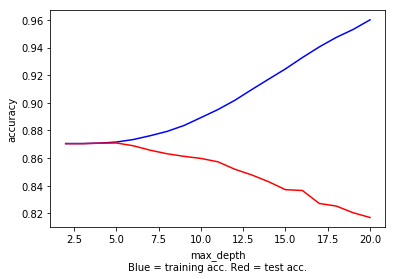

In [75]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))


plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r', )
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')



# At max_depth 5 ovefitting is  evident

#### Task 2.2 Grid Search

In [82]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8708364940348942
Test accuracy: 0.8707964601769912
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10820
          1       0.53      0.02      0.04      1610

avg / total       0.83      0.87      0.82     12430

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30}


In [106]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 35)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8708364940348942
Test accuracy: 0.8707964601769912
             precision    recall  f1-score   support

          0       0.87      1.00      0.93     10820
          1       0.53      0.02      0.04      1610

avg / total       0.83      0.87      0.82     12430

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32}


In [107]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    print("\n\n*********** Feature Importances ************\n")   
    for i in indices:
        print(f"{feature_names[i]:<35}:{importances[i]}")

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [108]:
analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")



*********** Feature Importances ************

WheelType_Alloy                    :0.2660911774635461
VehBCost                           :0.22003992799630373
MMRAcquisitionAuctionAveragePrice  :0.17079931673530363
Auction_MANHEIM                    :0.08809824400215292
MMRCurrentAuctionAveragePrice      :0.041278325603313334
VehOdo                             :0.03714828554447183
MMRCurrentRetailAveragePrice       :0.020934232658249216
VehYear_2007.0                     :0.020804235033372732
Transmission                       :0.02068827125658833
MMRCurrentRetailRatio              :0.01898839192131127
VehYear_2008.0                     :0.01619044406079522
VehYear_2006.0                     :0.015305892021513626
Size_LARGE                         :0.01512920961239882
MMRAcquisitonRetailCleanPrice      :0.014505439406140703
WarrantyCost                       :0.007724097250932208
VNST_CO                            :0.007692331273336058
TopThreeAmericanName_GM            :0.006846646112